In [13]:
import tensorflow  as tf
print(tf.__version__)

2.12.0


In [2]:
from helpers.dataset import CreateTensorflowDataset
# https://stackoverflow.com/questions/66805180/how-to-get-iou-of-single-class-in-keras-semantic-segmentation
# Creates the dataset not upscaled
data_path = '/workspaces/Satelite/data'
upscaled = False
list_of_cantons = ['AG', 'ZH', 'BE']
loader = CreateTensorflowDataset(data_path, list_of_cantons, upscaled)

Preparing the dataset...


2024-05-20 20:04:08.927854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [893]
	 [[{{node Placeholder/_1}}]]
2024-05-20 20:04:21.859219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [111]
	 [[{{node Placeholder/_1}}]]
2024-05-20 20:04:23.543664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [113]
	

Done preparing the dataset.


2024-07-07 16:18:47.455341: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-07 16:18:47.479647: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-07 16:18:48.765083: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-07 16:18:48.768906: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bu

(512, 512, 4) (512, 512, 1)
(512, 512, 4) (512, 512, 1)
(512, 512, 4) (512, 512, 1)
(512, 512, 4) (512, 512, 1)
(512, 512, 4) (512, 512, 1)
(512, 512, 4) (512, 512, 1)
(512, 512, 4) (512, 512, 1)
(512, 512, 4) (512, 512, 1)


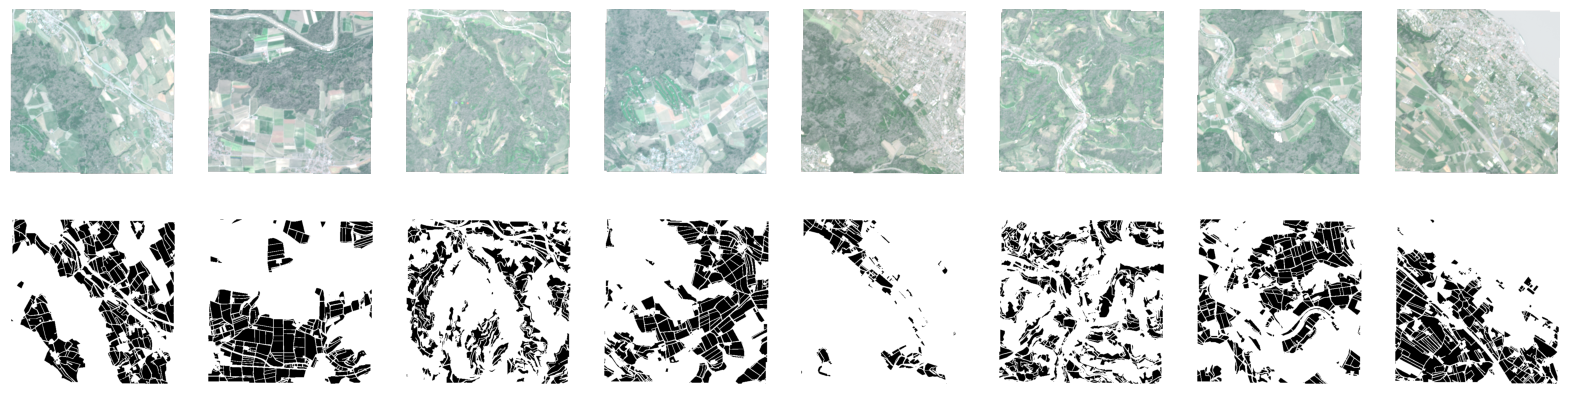

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_images(images, masks, num_images=8):
    fig, ax = plt.subplots(2, num_images, figsize=(20, 5))
    for i in range(num_images):
        ax[0, i].imshow(images[i])
        ax[0, i].axis('off')
        ax[1, i].imshow(masks[i].squeeze(), cmap='gray')
        ax[1, i].axis('off')
    plt.show()
    
path = "/workspaces/Satelite/data/dataset_upscaled_True/train"
train_data = tf.data.Dataset.load(path)

# Load the images and masks
images = []
masks = []

for image, mask in train_data.take(8):
    print(image.shape, mask.shape)
    images.append(image.numpy())
    masks.append(mask.numpy())

# Plot the images and masks
plot_images(images, masks, num_images=8)


In [1]:
import os
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from models.UNET import UNET
from helpers.load import LoadandAugment

# Import meaniou metri
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Base path for the dataset
path = "/workspaces/Satelite/data/dataset_upscaled_False"
train_path = os.path.join(path, "train")
val_path = os.path.join(path, "val")
test_path = os.path.join(path, "test")

# Initialize data loaders with correct target shape
train_data = LoadandAugment(train_path, "train", 8, False)
val_data = LoadandAugment(val_path, "val", 8, False)

# Initialize UNET model with correct input shape
attention_unet = UNET((256, 256, 4)).model
attention_unet.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

# Print the model summary
attention_unet.summary()

# Setup the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    'best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min'
)

# Train the model
attention_unet.fit(
    train_data.dataset, 
    validation_data=val_data.dataset, 
    epochs=50, 
    callbacks=[checkpoint_callback]
)


2024-06-13 16:42:56.221878: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-13 16:42:56.245957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 16:42:57.328994: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-13 16:42:57.332503: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bu

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  2368        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

2024-06-13 16:43:01.547454: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-06-13 16:43:03.051559: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f3e76580c20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-13 16:43:03.051584: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-06-13 16:43:03.057152: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-13 16:43:03.153056: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 [==============================] - ETA: 0s - loss: 0.4880 - accuracy: 0.7602
Epoch 1: val_loss improved from inf to 242.26131, saving model to best_model.h5
20/20 [==============================] - 20s 400ms/step - loss: 0.4880 - accuracy: 0.7602 - val_loss: 242.2613 - val_accuracy: 0.6740
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 0.3429 - accuracy: 0.8470
Epoch 2: val_loss improved from 242.26131 to 2.74823, saving model to best_model.h5
20/20 [==============================] - 3s 169ms/step - loss: 0.3429 - accuracy: 0.8470 - val_loss: 2.7482 - val_accuracy: 0.4417
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 0.3104 - accuracy: 0.8625
Epoch 3: val_loss improved from 2.74823 to 2.05535, saving model to best_model.h5
20/20 [==============================] - 3s 164ms/step - loss: 0.3104 - accuracy: 0.8625 - val_loss: 2.0554 - val_accuracy: 0.5184
Epoch 4/50
20/20 [==============================] - ETA: 0s - loss: 0.2940 - accuracy: 

1/1 [==============================] - 0s 222ms/step
Min prediction value: 0.0
Max prediction value: 1.0


IndexError: index 5 is out of bounds for axis 0 with size 5

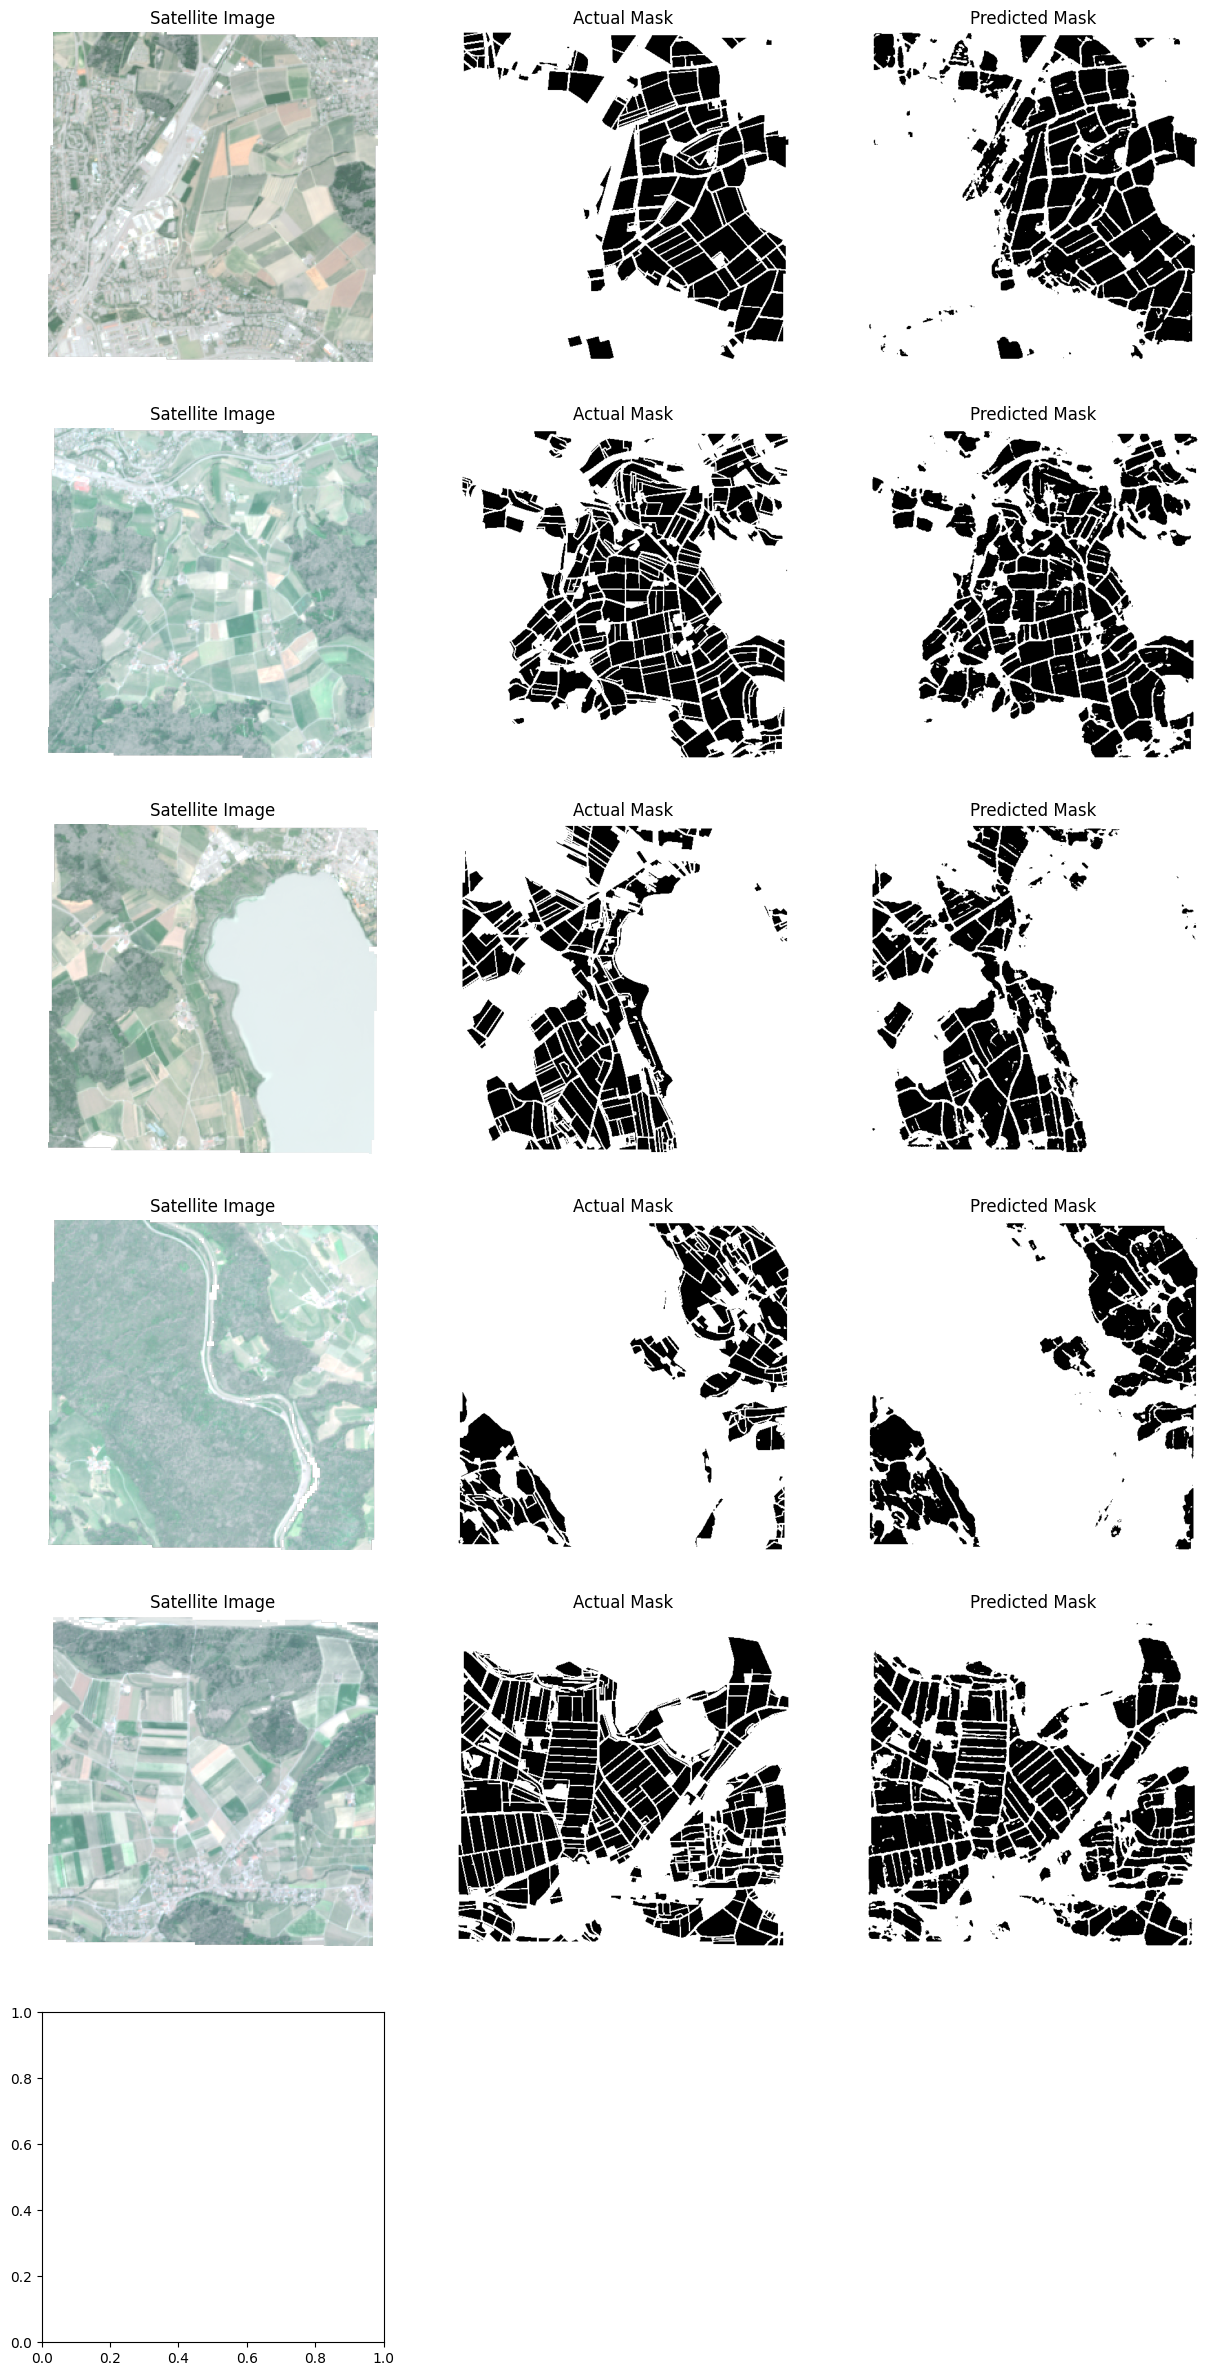

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

from models.RESUNETs import AttentionUNet
from helpers.load import LoadandAugment


# Base path for the dataset
path = "/workspaces/Satelite/data/dataset_upscaled_False"
test_path = os.path.join(path, "test")

def plot_predictions(images, masks, predictions, num=6):
    plt.figure(figsize=(15, 5*num))
    
    for i in range(num):
        plt.subplot(num, 3, i*3+1)
        plt.imshow(images[i])
        plt.title("Satellite Image")
        plt.axis('off')
        
        plt.subplot(num, 3, i*3+2)
        plt.imshow(masks[i], cmap='gray')
        plt.title("Actual Mask")
        plt.axis('off')

        plt.subplot(num, 3, i*3+3)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.title("Predicted Mask")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Assuming AttentionUNet is a function that returns a model
def get_attention_unet(input_shape):
    model = UNET(input_shape=input_shape)
    return model

# Load the best model
input_shape = (256, 256, 4)  # Adjust as necessary
unet = get_attention_unet(input_shape)
unet.model.load_weights('best_model.h5')

test_data_loader = LoadandAugment(test_path, "test", 5, True)

# Get the test dataset
test_dataset = test_data_loader.dataset

# Predict on the test data
for images, masks in test_dataset.take(1):
    predictions = unet.model.predict(images)
    predictions = (predictions > 0.5).astype(np.float32) 

# Check predictions
print("Min prediction value:", predictions.min())
print("Max prediction value:", predictions.max())

# Plot the predictions
plot_predictions(images.numpy(), masks.numpy(), predictions)
